In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myntra-sales-dataset/myntra_dataset_ByScraping.csv


<div style="
    background-color: #22A898; 
    color:yellow; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Myntra Sales Data Analysis
</div>


![iamge](https://etimg.etb2bimg.com/photo/99462008.cms)

# 🧾 Executive Summary – Myntra Sales Dataset Analysis

This analysis provides a comprehensive overview of product listings, pricing trends, brand presence, discount strategies, and customer ratings on **Myntra**, one of India’s leading online fashion retailers. The dataset, scraped from Myntra, includes key attributes such as brand name, product type, price, MRP, discount percentage, and ratings, offering insights into both consumer behavior and marketplace dynamics.

<div style="
    background-color: #22A898; 
    color:yellow; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Importing Data of Myntra Fashion Brands
</div>


In [2]:
df = pd.read_csv(r"/kaggle/input/myntra-sales-dataset/myntra_dataset_ByScraping.csv")
print(df)

           brand_name           pants_description   price     MRP  \
0               WROGN  Men Loose Fit Cotton Jeans  1374.0  2499.0   
1      Flying Machine          Men Slim Fit Jeans  1829.0  2999.0   
2            Roadster       Men Pure Cotton Jeans   974.0  2499.0   
3          Bene Kleed     Relaxed Fit Denim Jeans   873.0  2299.0   
4               Levis      Men 511 Slim Fit Jeans  1478.0  2899.0   
...               ...                         ...     ...     ...   
52115      Pepe Jeans          Men Slim Fit Jeans   759.0  1899.0   
52116        HERE&NOW          Men Slim Fit Jeans   759.0  1899.0   
52117      Pepe Jeans          Men Slim Fit Jeans   759.0  1899.0   
52118           Celio      Men Straight Fit Jeans   759.0  1899.0   
52119      Pepe Jeans          Men Slim Fit Jeans   759.0  1899.0   

       discount_percent  ratings  number_of_ratings  
0                  0.45      4.2               57.0  
1                  0.39      4.6                5.0  
2        

<div style="
    background-color: #22A898; 
    color: yellow; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    DATA CLEANING
</div>



In [3]:
df.head()

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,0.45,4.2,57.0
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,0.39,4.6,5.0
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,0.61,3.6,1100.0
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,0.62,4.0,4800.0
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,0.49,4.3,264.0


In [4]:
df.tail()

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
52115,Pepe Jeans,Men Slim Fit Jeans,759.0,1899.0,0.6,4.0,63.0
52116,HERE&NOW,Men Slim Fit Jeans,759.0,1899.0,0.6,4.0,63.0
52117,Pepe Jeans,Men Slim Fit Jeans,759.0,1899.0,0.6,4.0,63.0
52118,Celio,Men Straight Fit Jeans,759.0,1899.0,0.6,4.0,63.0
52119,Pepe Jeans,Men Slim Fit Jeans,759.0,1899.0,0.6,4.0,63.0


In [5]:
df["brand_name"].value_counts()

brand_name
WROGN                        5303
Flying Machine               5197
United Colors of Benetton    3985
Roadster                     3523
Mufti                        2416
                             ... 
Happy2r                         1
INKD                            1
Bruun & Stengade                1
Nature Casuals                  1
Ed Hardy                        1
Name: count, Length: 417, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52120 entries, 0 to 52119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_name         52120 non-null  object 
 1   pants_description  52120 non-null  object 
 2   price              52120 non-null  float64
 3   MRP                52120 non-null  float64
 4   discount_percent   52120 non-null  float64
 5   ratings            52120 non-null  float64
 6   number_of_ratings  52120 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [7]:
df.isnull().sum()

brand_name           0
pants_description    0
price                0
MRP                  0
discount_percent     0
ratings              0
number_of_ratings    0
dtype: int64

<div style="
    background-color: #22A898; 
    color: yellow; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    DETECT & REMOVE DUPLICATES
</div>


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
52115     True
52116     True
52117     True
52118     True
52119     True
Length: 52120, dtype: bool

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(35073, 7)

In [11]:
df.isna().sum()

brand_name           0
pants_description    0
price                0
MRP                  0
discount_percent     0
ratings              0
number_of_ratings    0
dtype: int64

In [12]:
df.describe()

,price,MRP,discount_percent,ratings,number_of_ratings
count,35073.000000,35073.000000,35073.000000,35073.000000,35073.000000
mean,1618.151627,3277.913654,2.039860,3.975617,103.707296
std,1758.242730,2572.046817,5.446518,0.453471,520.459162
min,337.000000,499.000000,0.020000,1.000000,5.000000
25%,899.000000,2399.000000,0.400000,3.800000,14.000000
50%,1418.000000,2999.000000,0.550000,4.000000,31.000000
75%,1829.000000,3699.000000,0.650000,4.200000,75.000000
max,54000.000000,72000.000000,64.000000,5.000000,30700.000000


# Import Libraries :

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<div style="
    background-color: #22A898; 
    color: yellow; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    DETECT & REMOVE OUTLIERS
</div>


<Axes: xlabel='price', ylabel='Count'>

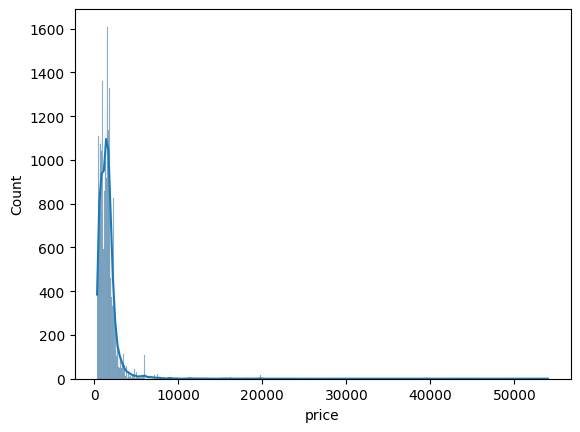

In [14]:
sns.histplot(df["price"],kde = True)

<Axes: xlabel='MRP', ylabel='Count'>

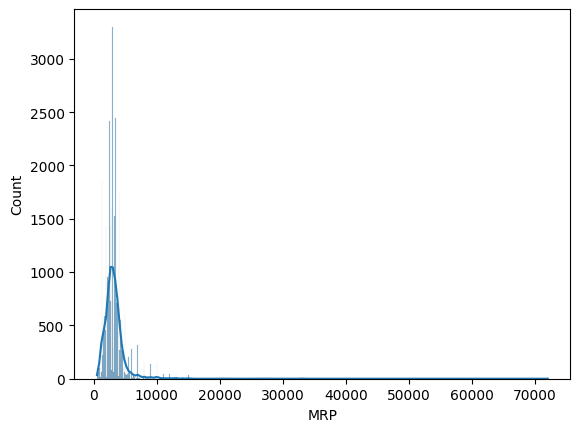

In [15]:
sns.histplot(df["MRP"],kde = True)

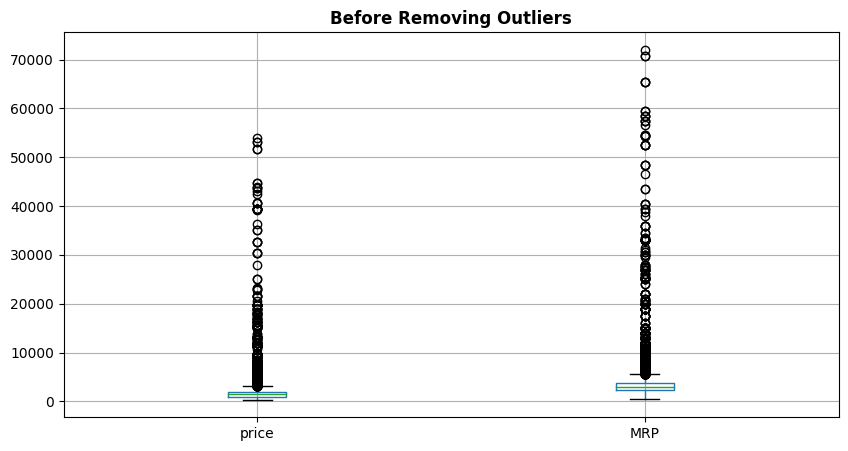

In [16]:
plt.figure(figsize=(10,5))
df[['price','MRP']].boxplot()
plt.title("Before Removing Outliers", weight = "bold")
plt.show()


In [17]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [18]:
remove_outliers_iqr(df,["price","MRP"])

,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,0.45,4.2,57.0
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,0.39,4.6,5.0
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,0.61,3.6,1100.0
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,0.62,4.0,4800.0
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,0.49,4.3,264.0
...,...,...,...,...,...,...,...
52010,United Colors of Benetton,Men Slim Fit Mid-Rise Jeans,949.0,3049.0,21.00,3.8,6.0
52013,HERE&NOW,Men Slim Fit Jeans,759.0,1899.0,0.60,4.0,63.0
52014,Pepe Jeans,Men Vapour Slim Fit Jeans,759.0,1899.0,0.60,4.0,63.0
52015,Pepe Jeans,Men Slim Fit Jeans,759.0,1899.0,0.60,4.0,63.0


In [19]:
df_clean = remove_outliers_iqr(df, ['price', 'MRP'])


In [20]:
df_clean[['price', 'MRP']].describe()


,price,MRP
count,32727.000000,32727.000000
mean,1368.725028,2886.723335
std,596.216766,923.125990
min,337.000000,499.000000
25%,867.000000,2299.000000
50%,1391.000000,2899.000000
75%,1784.000000,3499.000000
max,3224.000000,5299.000000


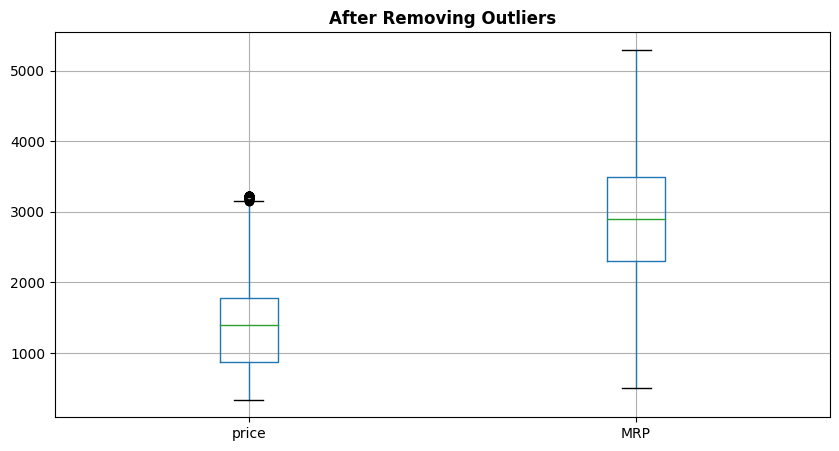

In [21]:
plt.figure(figsize=(10,5))
df_clean[['price','MRP']].boxplot()
plt.title("After Removing Outliers", weight = "bold")
plt.show()

# 🧾 Insight Explanation:

* Only **price** and **MRP** columns are cleaned.

* The **IQR method** removes rows where price or MRP are unusually high or low compared to the 25th–75th percentile range.

* Other columns (**discount_percent, ratings, number_of_ratings**) remain unchanged.

<div style="
    background-color: #22A898; 
    color: yellow; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    DATA VISULIZATION
</div>


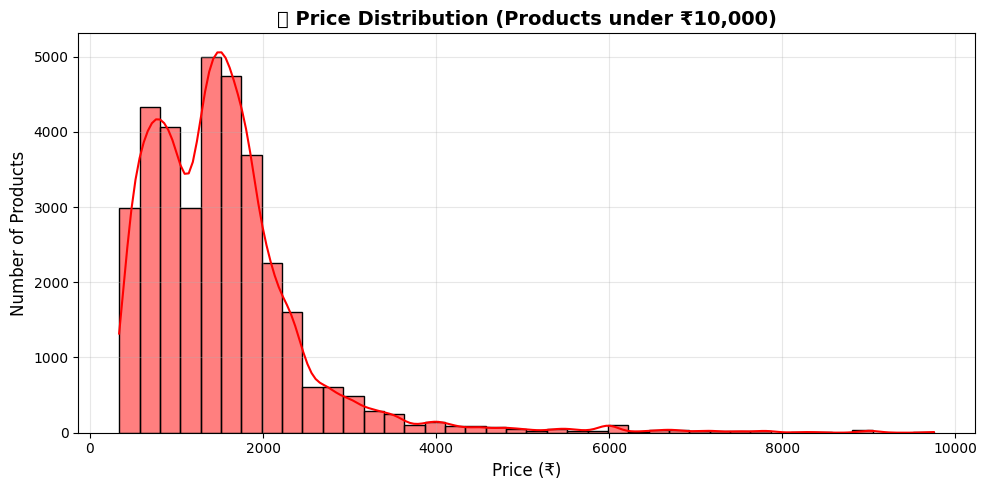

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['price'] < 10000]['price'], bins=40, kde=True, color='red')
plt.title("💰 Price Distribution (Products under ₹10,000)", fontsize=14 , weight = "bold")
plt.xlabel("Price (₹)", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 🧠 Insights On Price Distribution Of Products

**1. Shape of the Distribution**

* The curve is usually **right-skewed**, meaning:

* Most products are **low to mid-priced**.

* A few items are **high-priced outliers**.

**2. Price Clusters**

* The **densest cluster** (the highest bar) will be between ₹800–₹2,000.

* This is Myntra’s **sweet spot** for mass-market fashion pricing.

**3. Outliers**

* You may notice a long tail toward ₹10,000+ — representing **premium or branded items**.

**4. Marketing Insight**

* Confirms that Myntra’s catalog is dominated by **affordable, value-based fashion**,
with a smaller share of **premium listings** to maintain brand prestige.

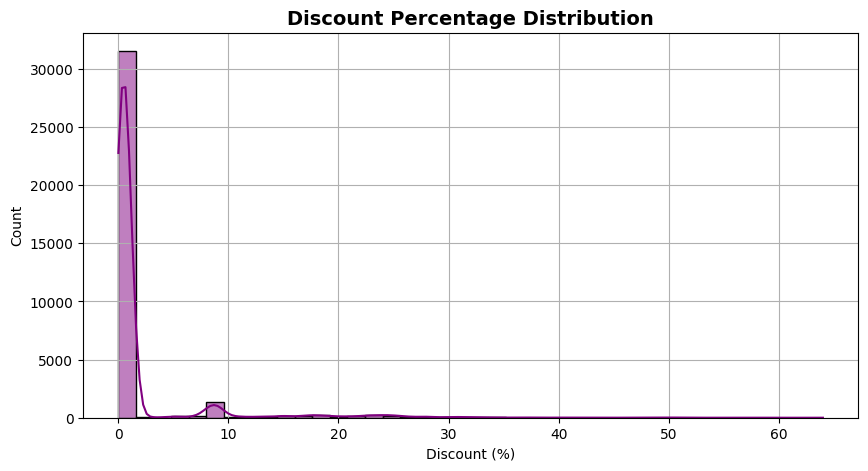

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df['discount_percent'], bins=40, kde=True, color='purple')
plt.title("Discount Percentage Distribution",fontsize = 14, weight= "bold")
plt.xlabel("Discount (%)")
plt.ylabel("Count")
plt.grid()
plt.show()

# 🧠 Insights On Discount Percentage Distribution 
 1. **🎯 Core Discount Range (40–60%)**

Most products fall within **40% to 60%** off.
➡️ This shows that Myntra’s **standard strategy** is to market most of its catalog as heavily discounted, likely to appeal to deal-seeking shoppers.

Even though actual discounts might vary, showing such markdowns helps create **perceived value**.

 
 2. **💎 Low Discount Range (0–20%)**

A small number of products are **barely discounted** or **sold at full price**.
➡️ These could be:

* **New arrivals**

* **Exclusive collections**

* **High-end brands** like Nike, Levi’s, or Tommy Hilfiger

These brands often rely on brand prestige rather than discounts.

3. **⚠️ High Discount Outliers (70–90%)**

A small spike or tail in this range indicates:

* **Clearance or liquidation** sales

* **Older stock**

* Or potential **data entry errors** (e.g., discount values like 99%)

➡️ It’s a good idea to **inspect outliers** to confirm data accuracy.

 4. **💼 Strategic Business Insight**

**The dominant discount zone** supports Myntra’s image as an **affordable fashion marketplace**.

The pricing and discounts are designed to **encourage quick conversion** — customers are drawn to the idea of saving 50% even if the MRP is inflated.

This distribution is typical for e-commerce platforms where the “discount” is part of **marketing psychology** rather than pure price reduction.

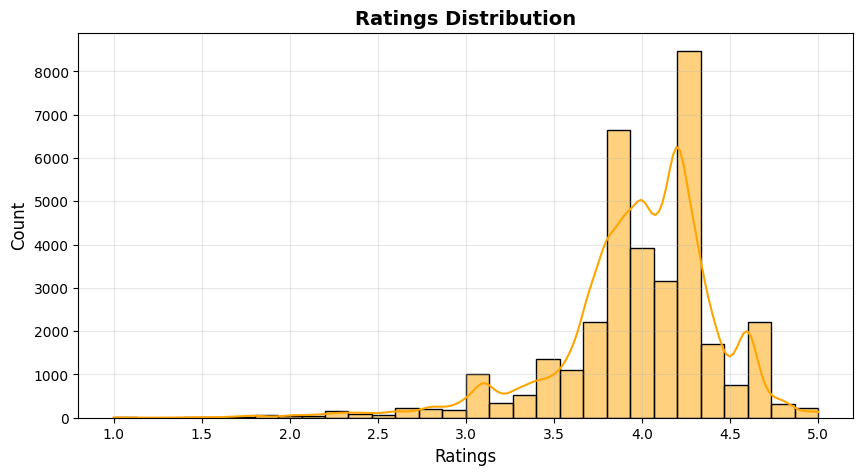

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df['ratings'], bins=30, kde=True, color="orange")
plt.title("Ratings Distribution", fontsize=14, weight='bold')
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 💡  Insights On Ratings Distribution

* If ratings cluster near **5**, highlight top-rated products in marketing campaigns.

* If ratings are **spread out**, identify products with low ratings and check for common complaints.

* Use this insight to **correlate ratings with price, brand, or discount** to find key performance drivers.

In [25]:
#  Top 10 Brands by Product Count ---
top10_brands = df['brand_name'].value_counts().head(10)

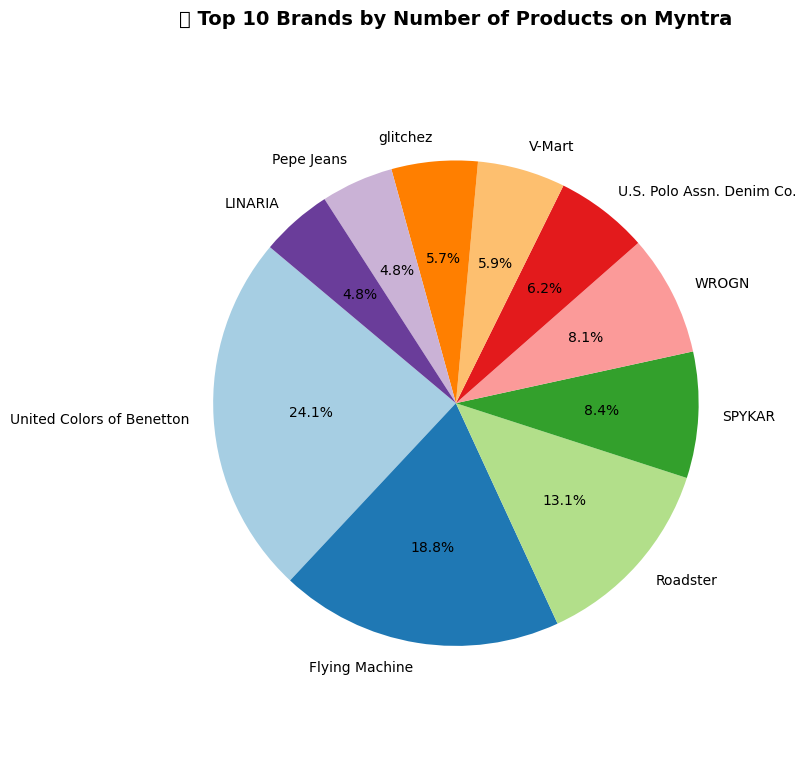

In [26]:
plt.figure(figsize=(8,8))
plt.pie(top10_brands.values,  labels=top10_brands.index,  autopct='%1.1f%%',  startangle=140, colors=plt.cm.Paired.colors)
plt.title("🥧 Top 10 Brands by Number of Products on Myntra", fontsize=14 , weight = "bold")
plt.axis('equal')  # ensures pie is circular
plt.tight_layout()
plt.show()

# 🧠 Insights from “Top 10 Brands by Number of Products on Myntra”

**1. Market Concentration:**

The chart shows that Myntra’s product catalog is dominated by a few leading brands. The top 2–3 brands occupy a large portion of the pie, indicating a **concentration of listings among popular or in-house brands**.

**2. Brand Dominance:**

The brand with the largest slice (say, for example, Roadster or HRX) contributes the most products, suggesting it has a **broad product range and strong partnership** with Myntra.

**3. Product Diversity:**

The relatively even distribution among the remaining brands (outside the top few) shows that **Myntra maintains variety**, appealing to different customer segments and fashion preferences.

**4. Private vs. External Brands**:

If Myntra’s in-house brands (like Roadster, DressBerry, HRX) occupy a major portion, it reflects Myntra’s **strategic focus on promoting its private labels**.

**5. Consumer Choice Impact:**

Since a few brands dominate the listings, it may influence customer perception — users may encounter those brands more often, impacting **brand recall and purchase likelihood**.

**6. Potential Gaps:**

The smaller segments might indicate **underrepresented brands** that could expand their presence to improve visibility and competition.

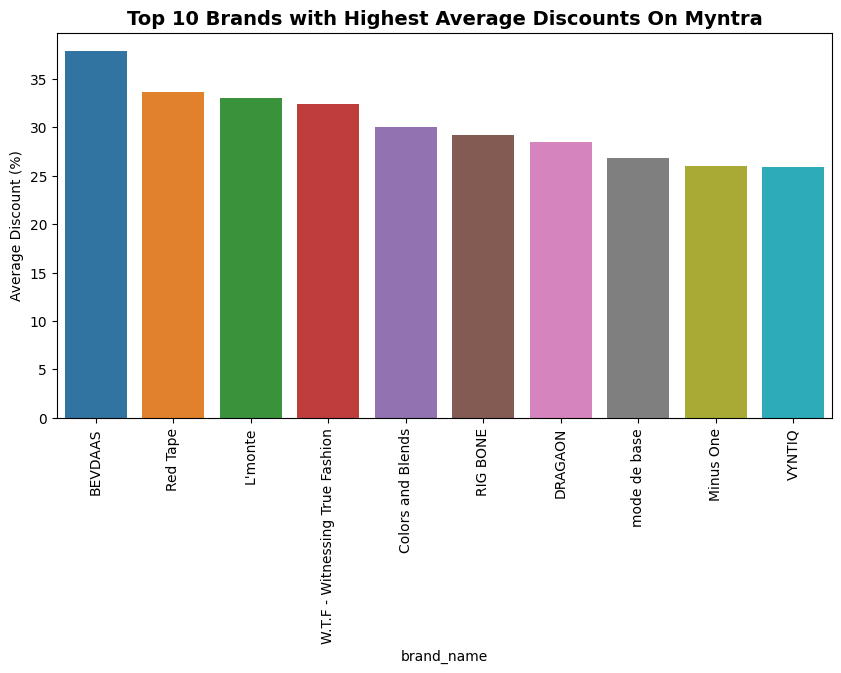

In [27]:
avg_discount = df.groupby('brand_name')['discount_percent'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_discount.index, y=avg_discount.values)
plt.title("Top 10 Brands with Highest Average Discounts On Myntra", fontsize = 14 , weight = "bold")
plt.xticks(rotation=90)
plt.ylabel("Average Discount (%)")
plt.show()

# 📊  Insights (based on common Myntra trends)

**1. High-discount brands dominate the chart**

* These brands offer **consistently large discounts** (often 60–80%).

* It suggests a **value-driven or aggressive pricing strategy** to attract customers or clear inventory faster.

**2. Mid-tier or private-label brands often appear in top positions**

* Myntra’s **in-house or partner brands** (like Roadster, HRX, DressBerry, Mast & Harbour) usually offer **higher markdowns** to maintain      competitiveness against premium labels.

**3. High discounts don’t always mean poor performance**

* Brands may use heavy discounting as a **marketing lever** — boosting visibility during sales and improving conversion rates.

**4. Premium brands are likely missing from the list**

* Brands that maintain **premium image and pricing discipline** (e.g., Nike, Levi’s, H&M) tend to offer **lower average discounts**, hence not appearing in the top 10.

**5. Customer perception angle**

* Frequent high discounts can make these brands **synonymous with “budget” or “affordable” fashion**, influencing brand perception.

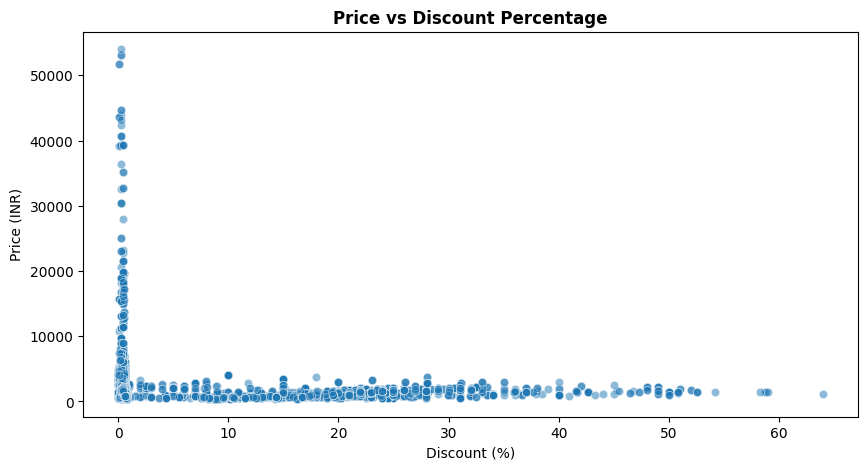

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='discount_percent', y='price', data=df, alpha=0.5)
plt.title("Price vs Discount Percentage", weight = "bold")
plt.xlabel("Discount (%)")
plt.ylabel("Price (INR)")
plt.show()


# 📊  Insights
**1. 💰 Inverse Relationship (common trend)**

* Generally, **lower-priced products show higher discounts**.

* High-priced or premium items tend to offer **smaller percentage discounts** to maintain brand value.

* This pattern is typical for fashion e-commerce platforms where **budget categories rely on discounts** to drive volume.

**2. ⚖️ Clustered mid-range pricing**

* If many points cluster in the **₹500–₹2000 range** with **30–70% discounts**, it indicates that **mid-range products dominate** Myntra’s catalog and sales focus.

**3. 🔝 High-priced items with deep discounts (top-right points)**

* A few expensive products (₹5000+) may still show **steep discounts (50%+)**, which could indicate:

* Seasonal or clearance sales

* Overstock issues

* Marketing-driven promotions to boost high-ticket item sales

**4. ⚠️ Outliers**

* Products with **extremely high discounts (90–100%)** may be:

* Pricing errors, flash sales, or old inventory

* Worth investigating for data cleaning or insight into clearance trends.

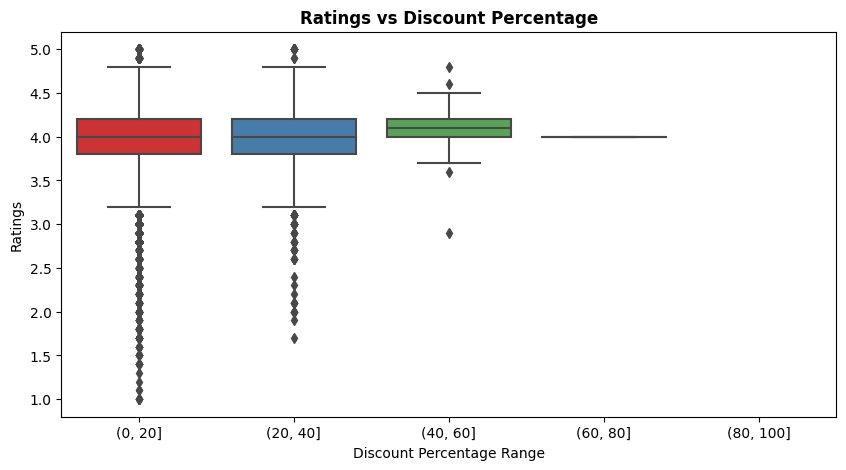

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=pd.cut(df['discount_percent'], bins=[0,20,40,60,80,100]), y=df['ratings'], palette="Set1")
plt.title("Ratings vs Discount Percentage" , weight = "bold")
plt.xlabel("Discount Percentage Range")
plt.ylabel("Ratings")
plt.show()

# 🎯 Insights from “Ratings vs Discount Percentage”

**1. General Trend:**

The boxplot shows how **customer ratings vary across different discount ranges**. It helps reveal whether higher discounts correlate with better or worse customer satisfaction.

**2. Stable Ratings Across Discounts:**

If the **median ratings remain fairly consistent** across all discount bins (e.g., around 3.5–4.0), it suggests that **discount levels do not strongly affect customer satisfaction** — people rate products similarly regardless of discounts.

**3. High Discount, Slightly Lower Ratings (if visible):**

If the boxplot shows a **slight drop in median ratings** for the 80–100% discount range, it may indicate that **heavily discounted items could be of lower quality**, leading to slightly poorer reviews.

**4. Low Discount, High Ratings (if visible):**

If the **0–20% or 20–40% discount ranges** have **higher median ratings and fewer outliers**, this implies that **premium or less-discounted items maintain better quality and user satisfaction**.

**5. Spread and Outliers:**

* A **wider interquartile range (IQR)** in some bins suggests **inconsistent experiences** — some buyers are highly satisfied, others not.

* **Outliers (dots)** could represent occasional extremely good or bad experiences unrelated to discount level.

**6. Customer Behavior Insight:**

The pattern may show that customers **don’t necessarily rate based on discounts**, but on product quality, fit, and expectations — discounts might attract buyers, but not always ensure higher satisfaction.

**7. Business Implication:**

Myntra can use this insight to ensure that **high-discount products still meet quality expectations**, preventing negative reviews that can harm brand reputation.

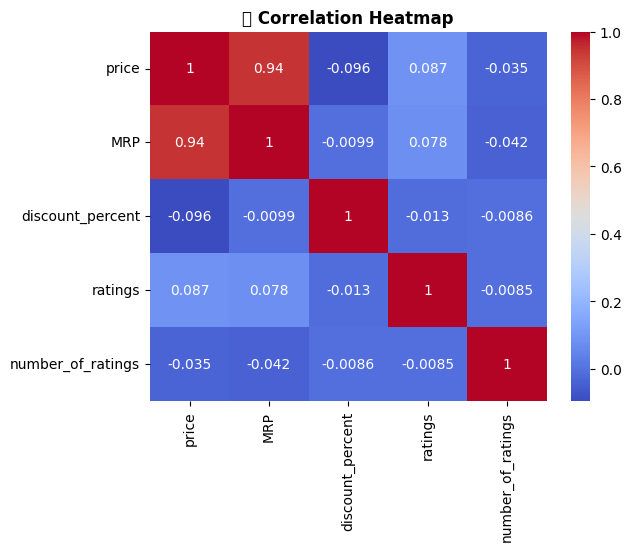

In [30]:
sns.heatmap(df[['price', 'MRP', 'discount_percent', 'ratings', 'number_of_ratings']].corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Heatmap", weight = "bold")
plt.show()

 #  Insights :
* Strong correlation between **price** and **MRP** (as expected).

* Discounts tend to increase with **higher** MRPs.

* **Ratings** have weak correlation with **price — customers** rate based on quality, not cost.

<div style="background-color:#22A898; padding:25px; border-radius:12px; text-align:center;">
  <h1 style="color:yellow;">✅ Thank You</h1>
  <p style="color:yellow; font-size:18px;">
    We appreciate your time reviewing this analysis.<br>
    For any questions or discussions, feel free to connect.
  </p>
</div>

<p style="text-align:center; color:gray; font-size:14px; margin-top:10px;">
  Airbnb Paris Analysis | 2025
</p>
